In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

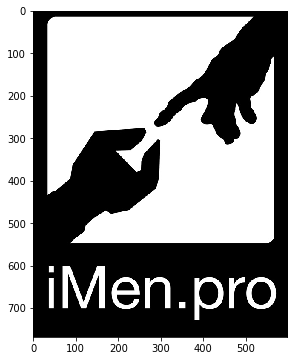

In [66]:
# read the image
image = mpimg.imread('img/IMEN_logoSigned.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(24, 6))
plt.imshow(gray, cmap='gray');

# 0. Salt and pepper noise

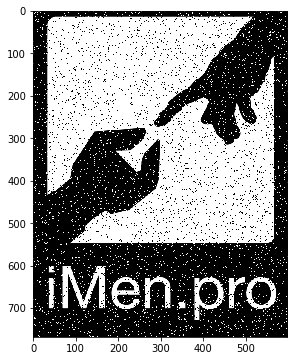

In [67]:
def sp_noise(image,prob):
#
# Add salt and pepper noise to image
# prob: Probability of the noise
#
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(gray,0.05)
plt.figure(figsize=(24, 6))
plt.imshow(noise_img, cmap='gray');

# 1. Erosions #

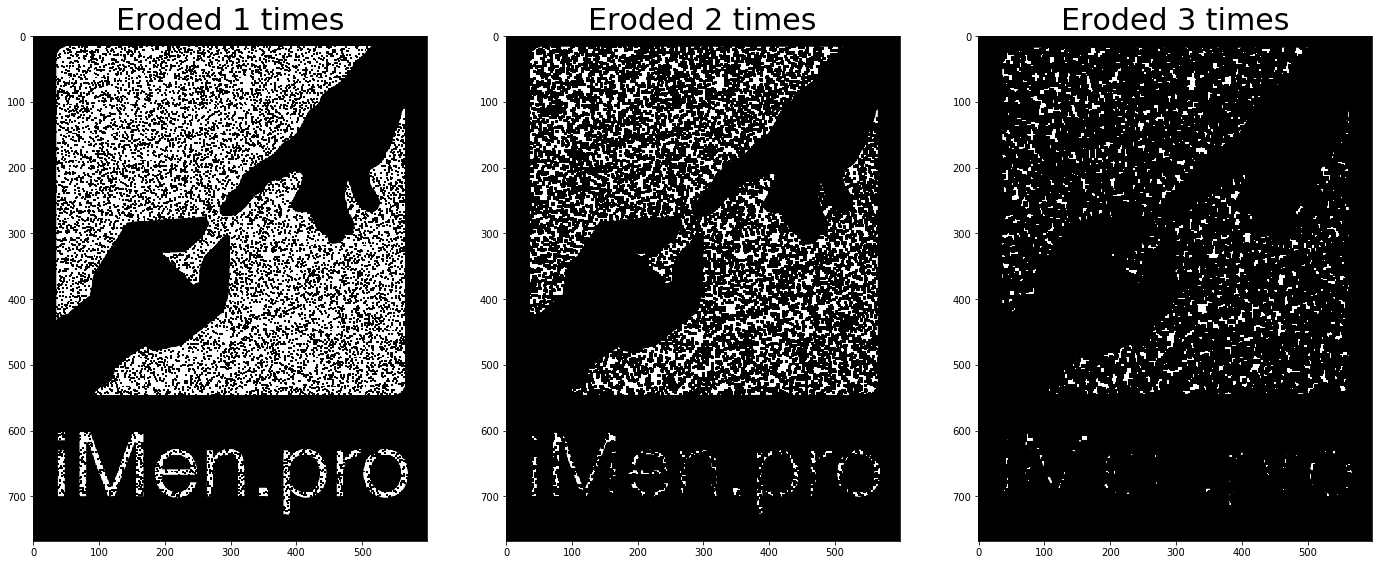

In [69]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))

# apply a series of erosions
for i in range(0, 3):
    eroded = #TODO: Apply erosion
    plts[i].imshow(eroded, cmap='gray'), plts[i].set_title("Eroded {} times".format(i + 1), fontsize=30);

# 2. Dilations

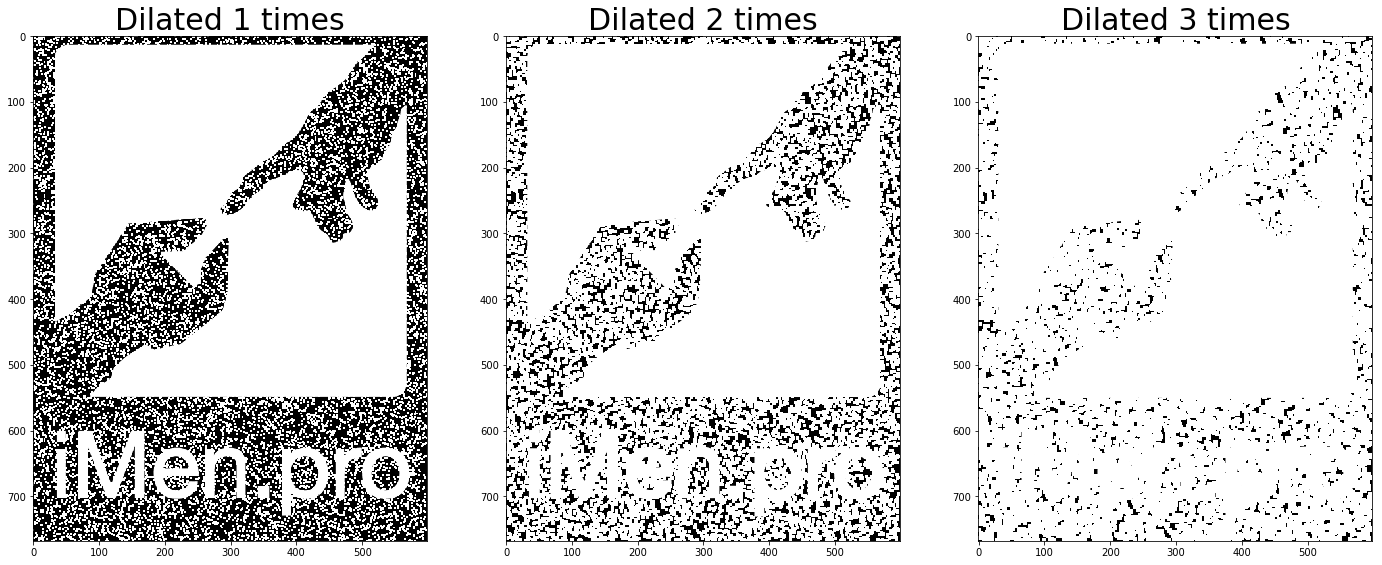

In [70]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))

# apply a series of dilations
for i in range(0, 3):
    dilated = #TODO: Apply dilations
    plts[i].imshow(dilated, cmap='gray'), plts[i].set_title("Dilated {} times".format(i + 1), fontsize=30);

# 3. Opening

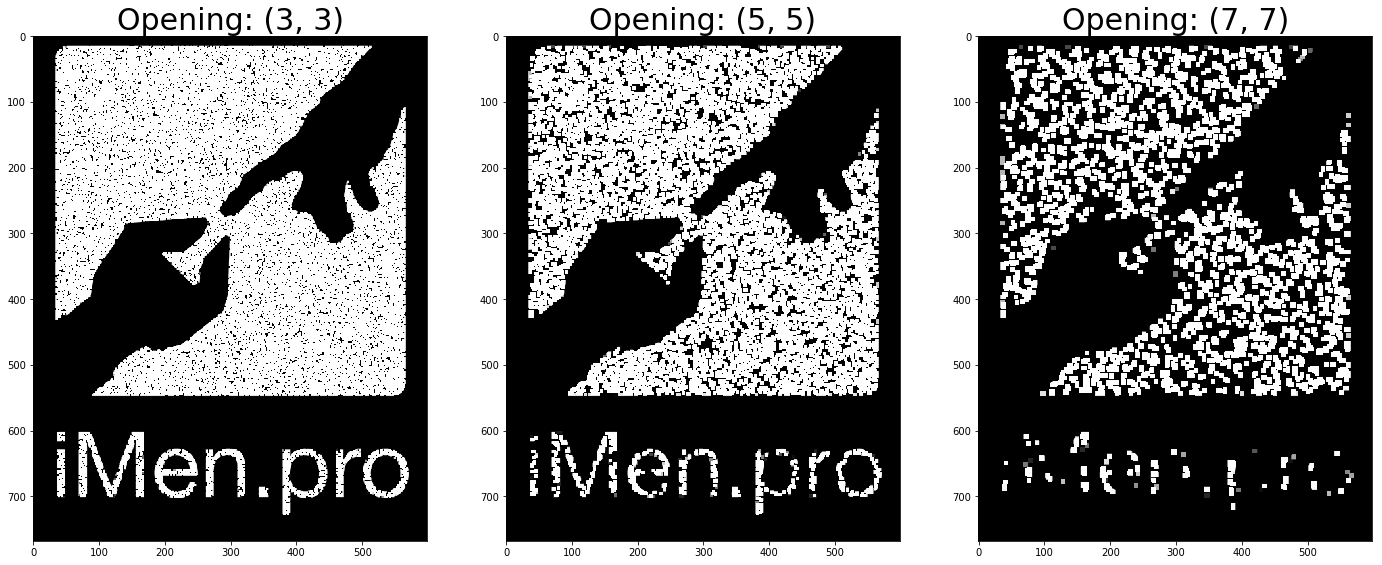

In [46]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))


# initialize the list
# of kernels sizes that will be applied to the image
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels and apply an "opening" operation to the image
for i, kernelSize in enumerate(kernelSizes):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = #TODO: Apply opening. HINT: cv2.morphologyEx
    plts[i].imshow(opening, cmap='gray')
    plts[i].set_title("Opening: ({}, {})".format(kernelSize[0], kernelSize[1]), fontsize=30);

# 4. Closing

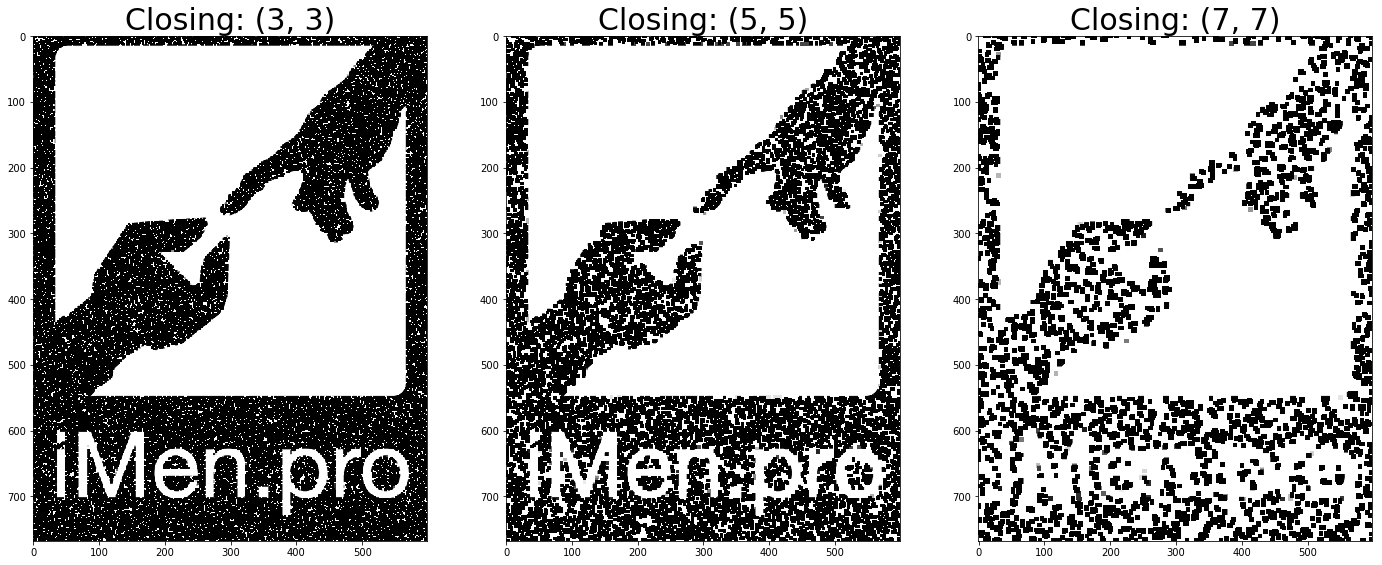

In [63]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))

# loop over the kernels and apply a "closing" operation to the image
for i, kernelSize in enumerate(kernelSizes):
    kernel = #TODO: Create the kernel
    closing = #TODO: Apply closing
    plts[i].imshow(closing, cmap='gray')
    plts[i].set_title("Closing: ({}, {})".format(kernelSize[0], kernelSize[1]), fontsize=30)

## Closing and opening together for noise filtering

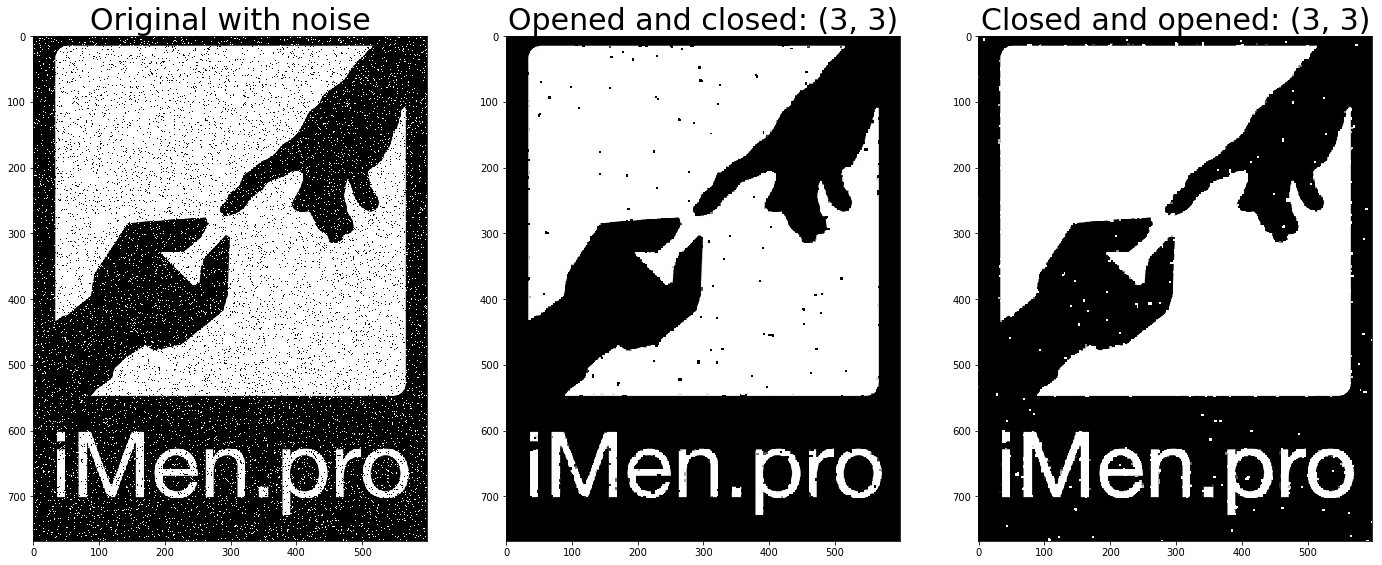

In [65]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))
plts[0].imshow(noise_img, cmap='gray')
plts[0].set_title("Original with noise", fontsize=30)

# loop over the kernels and apply a "closing" operation to the image
kernel = #TODO: create the kernel with the size (3,3)
opening = #TODO: Apply opening
closing = #TODO: Apply closing
plts[1].imshow(closing, cmap='gray')
plts[1].set_title("Opened and closed: ({}, {})".format(kernelSizes[0][0], kernelSizes[0][1]), fontsize=30);

closing = #TODO: Apply closing
opening = #TODO: Apply opening
plts[2].imshow(opening, cmap='gray')
plts[2].set_title("Closed and opened: ({}, {})".format(kernelSizes[0][0], kernelSizes[0][1]), fontsize=30);

# 5. Morphological gradient

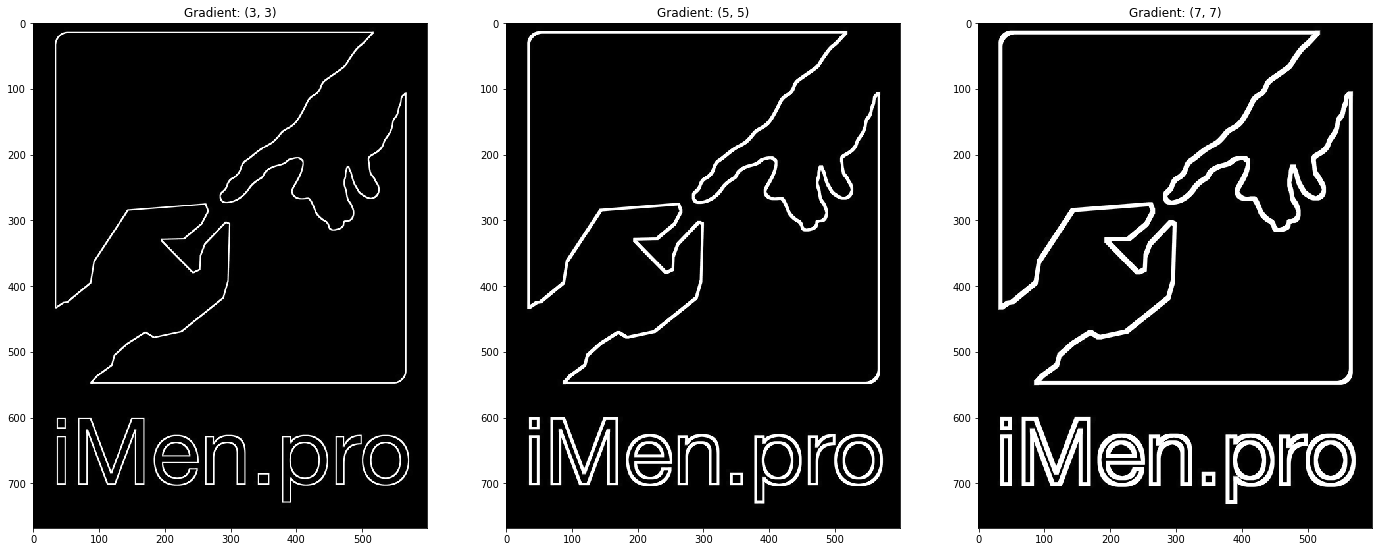

In [52]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))


# loop over the kernels and apply a "morphological gradient" operation
# to the image
for i, kernelSize in enumerate(kernelSizes):
    kernel = #TODO: Create the kernel
    gradient = #TODO: Apply morphological gradient
    plts[i].imshow(gradient, cmap='gray')
    plts[i].set_title("Gradient: ({}, {})".format(kernelSize[0], kernelSize[1]))